<h1 style = "color : #3D737D; text-align : center;"><em>City Hospital</em> - Data Preprocessing & Exploratory Analysis</h1>
<br>
<p style = "font-size : 12px; text-align: center;"><b>NOVA IMS</b></p>
<p style = "font-size : 10px; text-align: center;">Data Preprocessing and Visualization</p>
<p style = "font-size : 10px; text-align: center;">GROUP 8: Diogo Gonçalves, João Marques, Juan Mendes & Gustavo Franco</p>
<br>

<hr style = "border: 3px solid #3D737D;">
<h2  style = "color : #3D737D;text-align : center;"> Project Setup & Data Loading</h2>

<h3  style = "color : #3D737D;"> Imports</h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

<h3  style = "color : #3D737D;"> Dataset Assessment</h3>

<p style = "font-size : 15px;">Reading of dataset from <code>Project Data.xlsx</code> file</p>

In [3]:
project_data = pd.read_excel('Project Data.xlsx')

In [4]:
project_data.head()

,Patient ID,Age,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,Visit Date,Department,Consultation Duration,Satisfaction Level,Approximate Annual Income,Consultation Price,Insurance Coverage
0,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-02-22,Endocrinology,110,2,38839.0,293.014042,0.0
1,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-01-21,Emergency,76,4,52219.0,287.208982,0.0
2,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-06-13,Neurology,17,5,41491.0,241.254507,0.0
3,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-03-24,Emergency,15,3,34944.0,221.177483,0.0
4,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-03-19,Neurology,99,1,39248.0,219.743794,0.0


In [5]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Patient ID                 10008 non-null  int64         
 1   Age                        9952 non-null   float64       
 2   Gender                     10008 non-null  object        
 3   City of Residence          10008 non-null  object        
 4   Profession                 10008 non-null  object        
 5   Insurance Provider         8098 non-null   object        
 6   Family History             8015 non-null   object        
 7   Education Level            9979 non-null   object        
 8   Marital Status             10008 non-null  object        
 9   Visit Date                 10008 non-null  datetime64[ns]
 10  Department                 10008 non-null  object        
 11  Consultation Duration      10008 non-null  int64         
 12  Sati

In [6]:
project_data.shape

(10008, 16)

In [7]:
project_data.describe()

,Patient ID,Age,Visit Date,Consultation Duration,Satisfaction Level,Approximate Annual Income,Consultation Price,Insurance Coverage
count,10008.000000,9952.000000,10008,10008.000000,10008.000000,9.854000e+03,10008.000000,9958.000000
mean,1251.580735,50.635651,2024-03-31 14:53:14.244604160,67.807654,3.202338,4.340276e+04,187.263022,115.429366
min,1000.000000,0.000000,2024-01-01 00:00:00,15.000000,1.000000,0.000000e+00,50.036762,0.000000
25%,1127.000000,23.000000,2024-02-15 00:00:00,41.000000,2.000000,3.115775e+04,111.316562,59.692518
50%,1252.000000,52.000000,2024-03-31 00:00:00,68.000000,3.000000,4.087650e+04,159.531115,115.938998
75%,1375.000000,75.000000,2024-05-16 00:00:00,94.000000,5.000000,5.072175e+04,199.820999,165.437958
max,1499.000000,195.000000,2024-06-30 00:00:00,600.000000,6.000000,1.197090e+07,39999.222018,421.887836
std,144.576421,31.185608,NaN,32.447143,1.565507,2.681420e+05,862.865550,79.337759


<hr style = "border: 3px solid #3D737D;">
<h2  style = "color : #3D737D;text-align : center;"> Part A - Data Understanding & Cleaning</h2>

<h3 style = "color : #3D737D;">Analysis and Correction of Inconsistencies</h3>
<p style = "font-size : 15px;">Evaluation of each row on the missing values and structure.</p>

In [8]:
categorical_cols = project_data.select_dtypes(include=['object']).columns.tolist()

In [9]:
for col in categorical_cols:
    print(f"\nCOLUMN: {col}")
    print(f"Unique values ({project_data[col].nunique()} unique):")
    print(project_data[col].unique())


COLUMN: Gender
Unique values (3 unique):
['Female' 'Other' 'Male']

COLUMN: City of Residence
Unique values (8 unique):
['Birmingham' 'Edinburgh' 'Glasgow' 'Dublin' 'Manchester' 'Liverpool'
 'Belfast' 'London']

COLUMN: Profession
Unique values (10 unique):
['Retired' 'Lawyer' 'Doctor' 'Nurse' 'Student' 'Artist' 'Teacher'
 'Businessperson' 'Engineer' 'Scientist']

COLUMN: Insurance Provider
Unique values (4 unique):
[nan 'Provider A' 'Provider B' 'Provider C' 'Provider D']

COLUMN: Family History
Unique values (4 unique):
['Heart Disease' 'Diabetes' nan 'Hypertension' 'Cancer']

COLUMN: Education Level
Unique values (8 unique):
['Master' 'Undergraduate' 'Kindergarten' 'Middle school/junior high'
 'High school' 'Pre-school' 'Elementary school' nan 'PhD']

COLUMN: Marital Status
Unique values (4 unique):
['Divorced' 'Married' 'Single' 'Widowed']

COLUMN: Department
Unique values (13 unique):
['Endocrinology' 'Emergency' 'Neurology' 'Orthopedics' 'Psychiatry'
 'Rheumatology' 'Allergology

<p>As we can see, by the unique values of each variable defined as <code>Object</code>, we have no major inconsistencies and missing values are only categorised as <code>nan</code>.

<h4 style = "color : #3D737D;">Missing Values Evaluation</h4>

<h4 style = "color : #3D737D;"><code>Satisfaction Level</code></h4>
<p>This variable consists of the evaluation that the people did over their consultation, and it is an integer range from 1 to 5, so we should check its consistency</p>

In [10]:
project_data["Satisfaction Level"].unique()

array([2, 4, 5, 3, 1, 6])

<p>As we can see, there are evaluations with 6, which is not possible, this is a clear inconsistency</p>
<p>Let's replace those entries with the mode, as the mode is an integer (differently to the mean or median) and we ensure that we are not biased in imputing those values (as we would if we replaced with 5).</p>

In [11]:
project_data["Satisfaction Level"] = project_data["Satisfaction Level"].replace(6, project_data["Satisfaction Level"].mode()[0])

In [12]:
project_data["Satisfaction Level"].unique()

array([2, 4, 5, 3, 1])

<h3 style = "color : #3D737D;">Missing Value Analysis & Imputation</h3>

In [13]:
for col in project_data.columns:
    print(f"\nCOLUMN: {col}")
    print(f"{project_data[col].isna().sum()} missing values.")
    print(f'This represents {(project_data[col].isna().sum()/len(project_data[col]))*100:.2f}% of the total values.')


COLUMN: Patient ID
0 missing values.
This represents 0.00% of the total values.

COLUMN: Age
56 missing values.
This represents 0.56% of the total values.

COLUMN: Gender
0 missing values.
This represents 0.00% of the total values.

COLUMN: City of Residence
0 missing values.
This represents 0.00% of the total values.

COLUMN: Profession
0 missing values.
This represents 0.00% of the total values.

COLUMN: Insurance Provider
1910 missing values.
This represents 19.08% of the total values.

COLUMN: Family History
1993 missing values.
This represents 19.91% of the total values.

COLUMN: Education Level
29 missing values.
This represents 0.29% of the total values.

COLUMN: Marital Status
0 missing values.
This represents 0.00% of the total values.

COLUMN: Visit Date
0 missing values.
This represents 0.00% of the total values.

COLUMN: Department
0 missing values.
This represents 0.00% of the total values.

COLUMN: Consultation Duration
0 missing values.
This represents 0.00% of the tota

<p>For the missing values, que can conclude that the columns with missing values are:</p>
<ul>
<li><code>Age</code>: 0.56% missing values</li>
<li><code>Insurance Provider</code>: 19.08% missing values</li>
<li><code>Family History</code>: 19.91% missing values</li>
<li><code>Education Level</code>: 0.29% missing values</li>
<li><code>Approximate Annual Income</code>: 1.54% missing values</li>
<li><code>Insurance Coverage</code>: 0.50% missing values</li>
</ul>

<h4 style = "color : #3D737D;">Imputation</h4>
<p> Since all missing values are relatively low, we chose imputation over deletion/dropping</p>

In [14]:
categorical_variables_with_NaN = ["Insurance Provider", "Family History", "Education Level"]
numerical_variables_with_NaN = ["Age", "Approximate Annual Income", "Insurance Coverage"]

In [15]:
def treat_NaN_categorical(data, list_to_treat):
    for var in list_to_treat:
        data[var] = data[var].fillna(data[var].mode()[0])

def treat_NaN_numerical(data, list_to_treat):
    for var in list_to_treat:
        data[var] = data[var].fillna(data[var].median())

In [16]:
treat_NaN_categorical(project_data, categorical_variables_with_NaN)
treat_NaN_numerical(project_data, numerical_variables_with_NaN)

In [17]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Patient ID                 10008 non-null  int64         
 1   Age                        10008 non-null  float64       
 2   Gender                     10008 non-null  object        
 3   City of Residence          10008 non-null  object        
 4   Profession                 10008 non-null  object        
 5   Insurance Provider         10008 non-null  object        
 6   Family History             10008 non-null  object        
 7   Education Level            10008 non-null  object        
 8   Marital Status             10008 non-null  object        
 9   Visit Date                 10008 non-null  datetime64[ns]
 10  Department                 10008 non-null  object        
 11  Consultation Duration      10008 non-null  int64         
 12  Sati

<h3 style = "color : #3D737D;">Outlier Analysis and Treatment</h3>

In [18]:
numerical_cols_outliers = ["Age", "Consultation Duration", "Approximate Annual Income", "Consultation Price", 'Insurance Coverage']

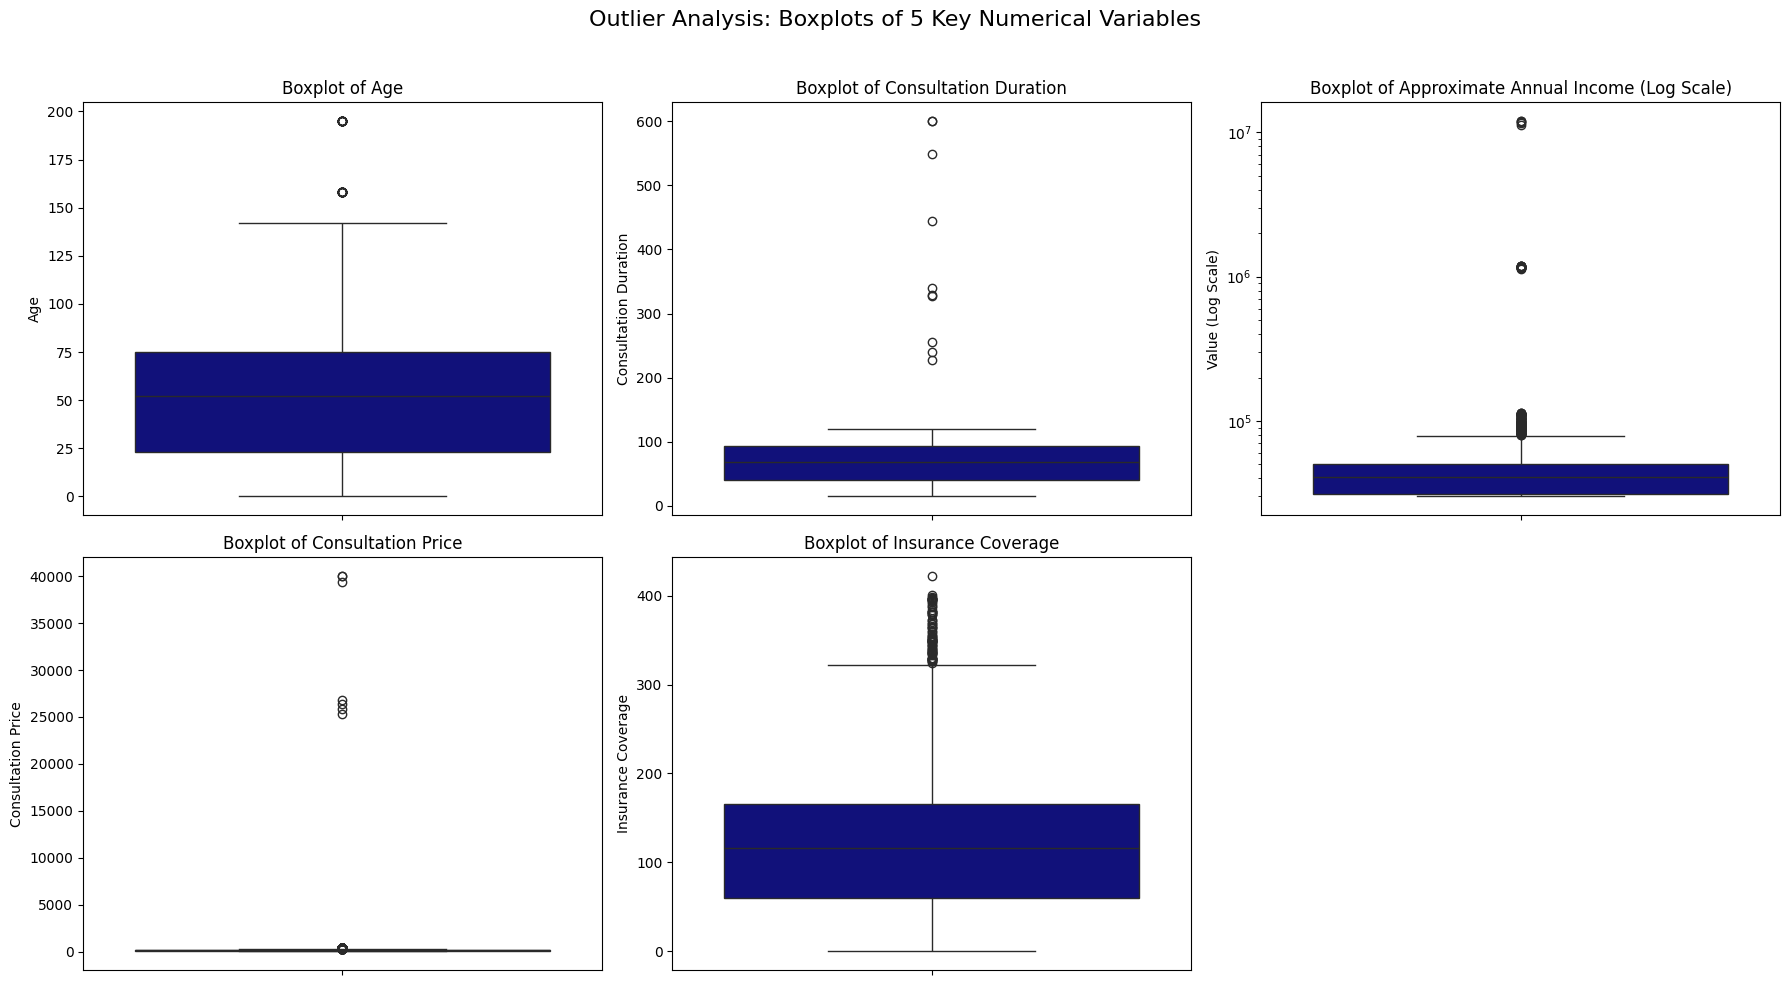

In [19]:
plt.figure(figsize=(18, 10))
plt.suptitle('Outlier Analysis: Boxplots of 5 Key Numerical Variables', fontsize=16)

for i in range(len(numerical_cols_outliers)):
    col = numerical_cols_outliers[i]
    
    # FIX: Use 2 rows, 3 columns (6 slots) to fit 5 plots neatly
    plt.subplot(2, 3, i + 1) 
    
    sns.boxplot(y=project_data[col], color='darkblue')
    
    # Criticality: Applying log scale for better visualization of highly skewed income
    if col == 'Approximate Annual Income':
        plt.yscale('log')
        plt.ylabel('Value (Log Scale)')
        plt.title(f'Boxplot of {col} (Log Scale)')
    else:
        plt.title(f'Boxplot of {col}')

plt.tight_layout(rect=[0, 0, 1, 0.96])

In [20]:
def get_percentile(series, percentile):
    return series.quantile(percentile / 100)

In [21]:
def cap_outliers(series, lower_bound, upper_bound):
    return np.clip(series, lower_bound, upper_bound)

In [22]:
for col in numerical_cols_outliers:
    # Calculate 1st and 99th percentile thresholds
    p1 = get_percentile(project_data[col].dropna(), 1)
    p99 = get_percentile(project_data[col].dropna(), 99)
    
    # Critical Check: Ensure the lower bound is not negative (e.g., Age)
    lower_bound = max(0, p1)
    
    # Apply the capping function
    project_data[col] = cap_outliers(project_data[col], lower_bound, p99)
    
    # Report the action
    print(f"[{col}]: Capped values below {lower_bound:.2f} and above {p99:.2f}")

[Age]: Capped values below 0.00 and above 118.00
[Consultation Duration]: Capped values below 16.00 and above 119.00
[Approximate Annual Income]: Capped values below 0.00 and above 85306.82
[Consultation Price]: Capped values below 52.62 and above 374.25
[Insurance Coverage]: Capped values below 0.00 and above 313.96


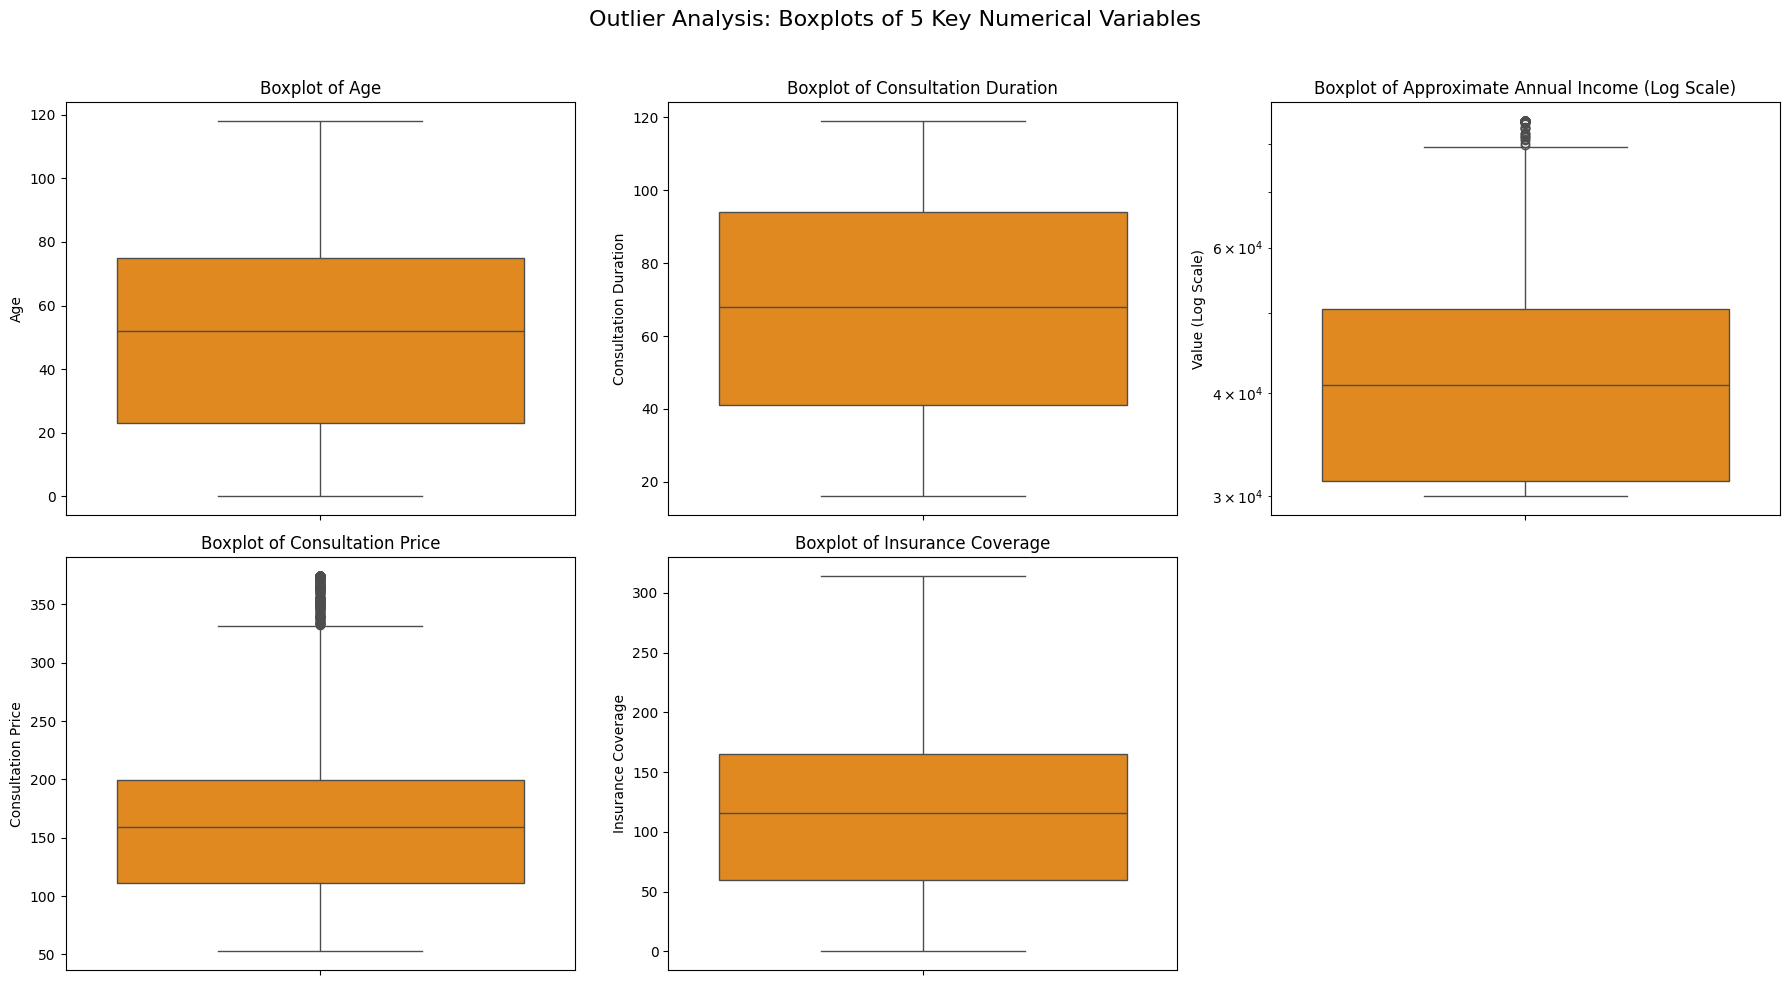

In [23]:
plt.figure(figsize=(18, 10))
plt.suptitle('Outlier Analysis: Boxplots of 5 Key Numerical Variables', fontsize=16)

for i in range(len(numerical_cols_outliers)):
    col = numerical_cols_outliers[i]
    
    # FIX: Use 2 rows, 3 columns (6 slots) to fit 5 plots neatly
    plt.subplot(2, 3, i + 1) 
    
    sns.boxplot(y=project_data[col], color='darkorange')
    
    # Criticality: Applying log scale for better visualization of highly skewed income
    if col == 'Approximate Annual Income':
        plt.yscale('log')
        plt.ylabel('Value (Log Scale)')
        plt.title(f'Boxplot of {col} (Log Scale)')
    else:
        plt.title(f'Boxplot of {col}')

plt.tight_layout(rect=[0, 0, 1, 0.96])

<hr style = "border: 3px solid #3D737D;">
<h2  style = "color : #3D737D;text-align : center;"> Part B: Feature Engineering & ABT Construction</h2>

Aggregate all patients with same ID in a single row

In [24]:
ABT_city_hospital = project_data.groupby('Patient ID').agg(
    
    # Activity/Frequency (F)
    Total_Visits=('Visit Date', 'count'), 
    
    # Monetary (M)
    Total_Consultation_Price=('Consultation Price', 'sum'),
    
    # Satisfaction & Service Averages
    Avg_Consultation_Duration=('Consultation Duration', 'mean'),
    Avg_Satisfaction_Level=('Satisfaction Level', 'mean'),
    Avg_Insurance_Coverage=('Insurance Coverage', 'mean'),
    
    # Time-related for Recency/Tenure (Max/Min Date)
    Last_Visit_Date=('Visit Date', 'max'),
    First_Visit_Date=('Visit Date', 'min')
    
).reset_index()

In [25]:
ABT_city_hospital.head()

,Patient ID,Total_Visits,Total_Consultation_Price,Avg_Consultation_Duration,Avg_Satisfaction_Level,Avg_Insurance_Coverage,Last_Visit_Date,First_Visit_Date
0,1000,20,3497.062357,65.700000,2.600000,171.838472,2024-06-27,2024-01-01
1,1001,16,2396.985814,60.500000,2.625000,104.868129,2024-06-27,2024-01-02
2,1002,18,2919.254806,71.055556,3.277778,113.526576,2024-06-23,2024-01-06
3,1003,25,4485.140348,61.440000,3.000000,143.555626,2024-06-29,2024-01-03
4,1004,26,4486.940577,62.692308,2.923077,155.289553,2024-06-28,2024-01-01


In [26]:
reference_date = pd.to_datetime(ABT_city_hospital['Last_Visit_Date']).max() + pd.Timedelta(days=1)

# Recency (R): Days since the patient's last visit (Last_Visit_Date)
ABT_city_hospital['Recency_Days'] = (reference_date - pd.to_datetime(ABT_city_hospital['Last_Visit_Date'])).dt.days

# Tenure: Total days the patient has been active
ABT_city_hospital['Tenure_Days'] = (pd.to_datetime(ABT_city_hospital['Last_Visit_Date']) - pd.to_datetime(ABT_city_hospital['First_Visit_Date'])).dt.days

# Frequency Per Day: Standardized activity rate (Total Visits / Tenure)
# We add 1 to the denominator (Tenure_Days + 1) to handle patients who had only one visit (Tenure=0).
ABT_city_hospital['Frequency_Per_Day'] = ABT_city_hospital['Total_Visits'] / (ABT_city_hospital['Tenure_Days'] + 1)


ABT_city_hospital.head()

,Patient ID,Total_Visits,Total_Consultation_Price,Avg_Consultation_Duration,Avg_Satisfaction_Level,Avg_Insurance_Coverage,Last_Visit_Date,First_Visit_Date,Recency_Days,Tenure_Days,Frequency_Per_Day
0,1000,20,3497.062357,65.700000,2.600000,171.838472,2024-06-27,2024-01-01,4,178,0.111732
1,1001,16,2396.985814,60.500000,2.625000,104.868129,2024-06-27,2024-01-02,4,177,0.089888
2,1002,18,2919.254806,71.055556,3.277778,113.526576,2024-06-23,2024-01-06,8,169,0.105882
3,1003,25,4485.140348,61.440000,3.000000,143.555626,2024-06-29,2024-01-03,2,178,0.139665
4,1004,26,4486.940577,62.692308,2.923077,155.289553,2024-06-28,2024-01-01,3,179,0.144444


In [27]:
# 3a. Static Attributes: Use 'first' to pull the single demographic value per patient.
static_features = project_data.groupby('Patient ID').agg({
    'Age': 'first',
    'Gender': 'first',
    'City of Residence': 'first',
    'Profession': 'first',
    'Family History': 'first',
    'Marital Status': 'first',
    'Approximate Annual Income': 'first' # Uses the capped income value
})


# 3b. Department Usage Pattern: Create a feature matrix (One-Hot Encoding of counts)
# pd.crosstab is the smart way to count unique department visits per patient.
department_counts = pd.crosstab(
    project_data['Patient ID'], project_data['Department']
).add_prefix('Dept_Count_')



In [28]:
ABT_city_hospital = ABT_city_hospital.merge(static_features, on='Patient ID', how='left')

# Merge in department counts
ABT_city_hospital = ABT_city_hospital.merge(department_counts, on='Patient ID', how='left')

# Drop intermediate date columns (keeping Recency_Days and Frequency_Per_Day)
#ABT_city_hospital.drop(columns=['Last_Visit_Date', 'First_Visit_Date', 'Tenure_Days'], inplace=True)


ABT_city_hospital.head()

,Patient ID,Total_Visits,Total_Consultation_Price,Avg_Consultation_Duration,Avg_Satisfaction_Level,Avg_Insurance_Coverage,Last_Visit_Date,First_Visit_Date,Recency_Days,Tenure_Days,...,Dept_Count_ENT,Dept_Count_Emergency,Dept_Count_Endocrinology,Dept_Count_Gastroenterology,Dept_Count_General Practice,Dept_Count_Neurology,Dept_Count_Orthopedics,Dept_Count_Psychiatry,Dept_Count_Pulmonology,Dept_Count_Rheumatology
0,1000,20,3497.062357,65.700000,2.600000,171.838472,2024-06-27,2024-01-01,4,178,...,1,2,2,0,2,0,0,2,3,2
1,1001,16,2396.985814,60.500000,2.625000,104.868129,2024-06-27,2024-01-02,4,177,...,3,2,1,1,2,1,0,1,0,2
2,1002,18,2919.254806,71.055556,3.277778,113.526576,2024-06-23,2024-01-06,8,169,...,1,0,0,1,1,3,1,5,1,1
3,1003,25,4485.140348,61.440000,3.000000,143.555626,2024-06-29,2024-01-03,2,178,...,2,2,3,1,1,3,2,5,1,4
4,1004,26,4486.940577,62.692308,2.923077,155.289553,2024-06-28,2024-01-01,3,179,...,0,3,2,4,5,5,0,2,1,0


Visualization and data understanding
for this we are going to use graphical aproaches to understand various aspects of the data

In [29]:
#visits over time 



In [30]:
#visits per department
project_data['Visit Date'].max()

Timestamp('2024-06-30 00:00:00')

In [31]:
project_data['Visit Date'].min()

Timestamp('2024-01-01 00:00:00')

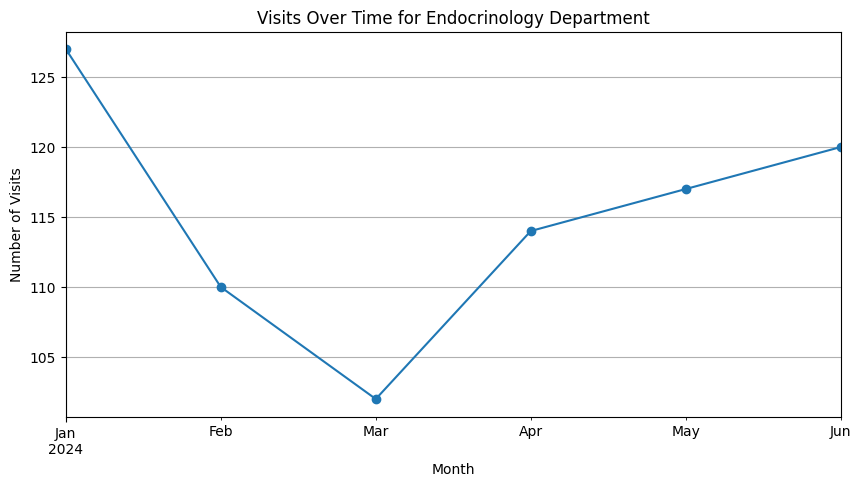

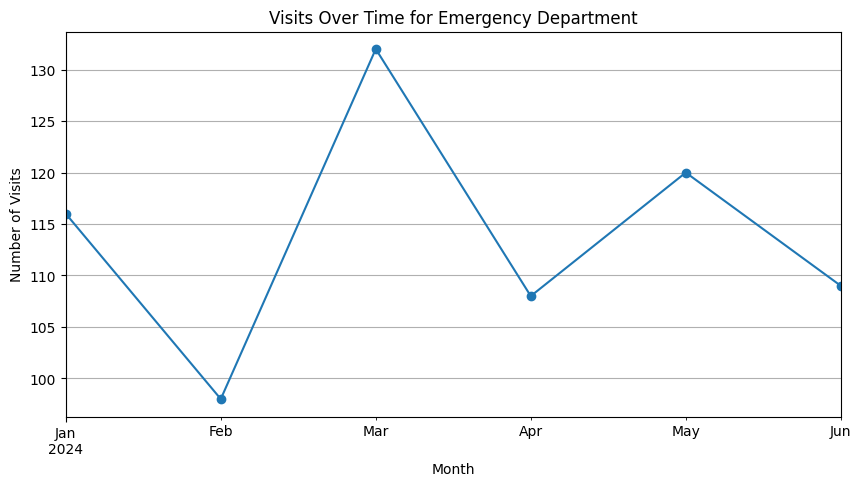

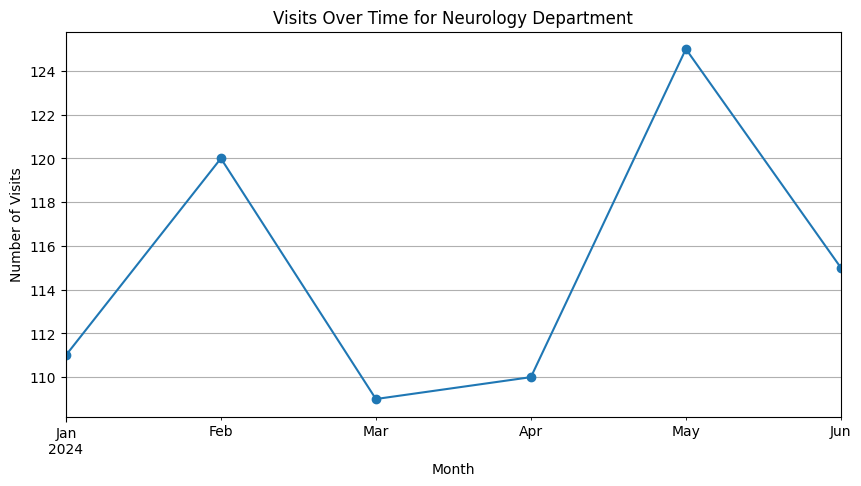

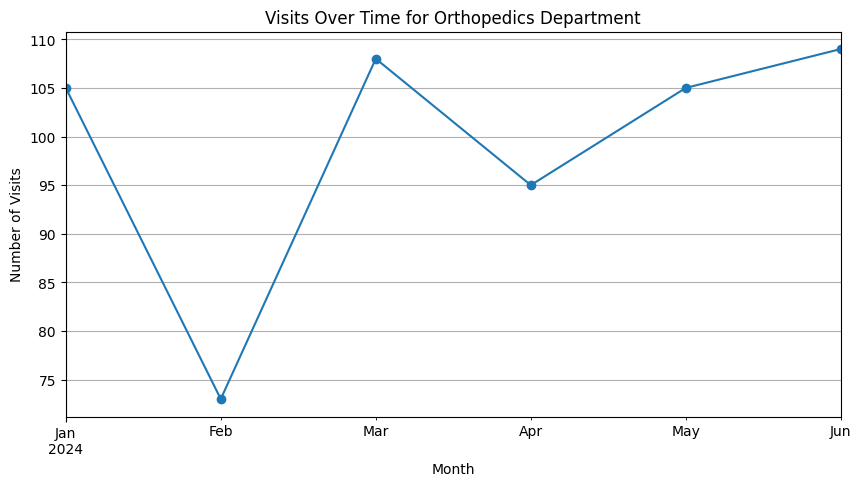

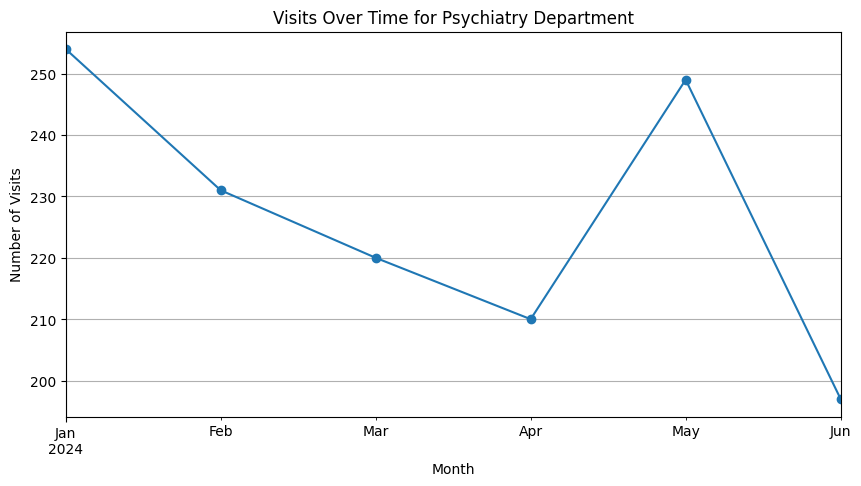

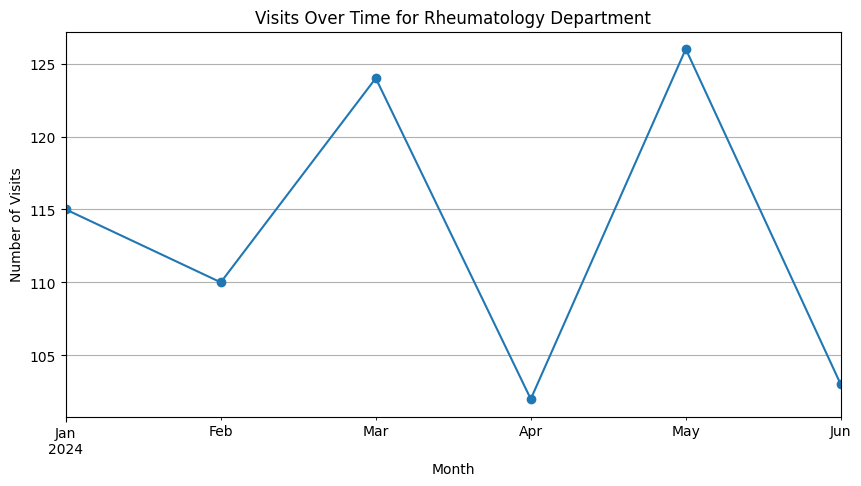

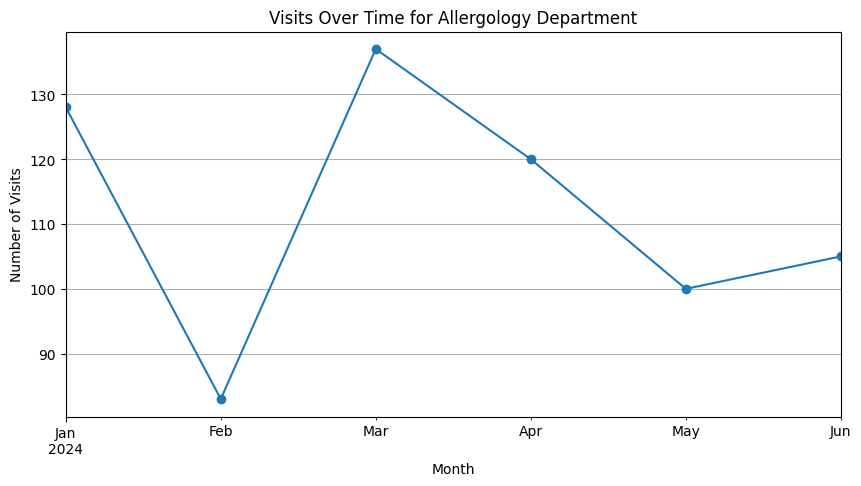

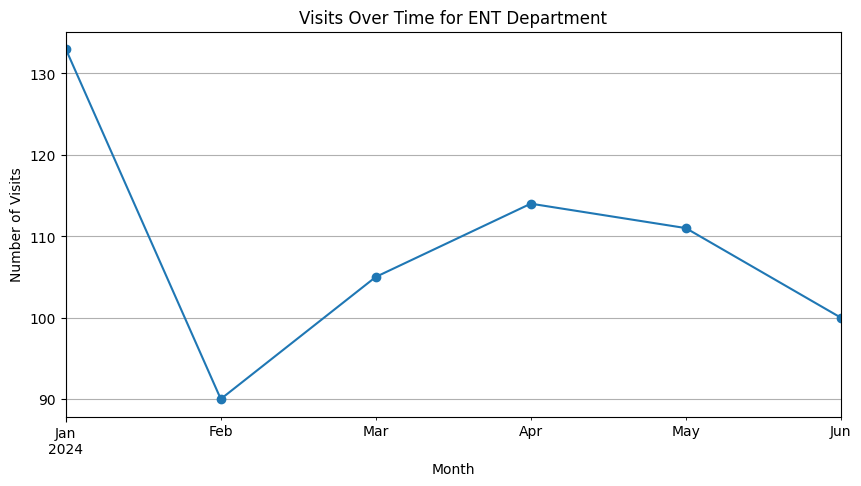

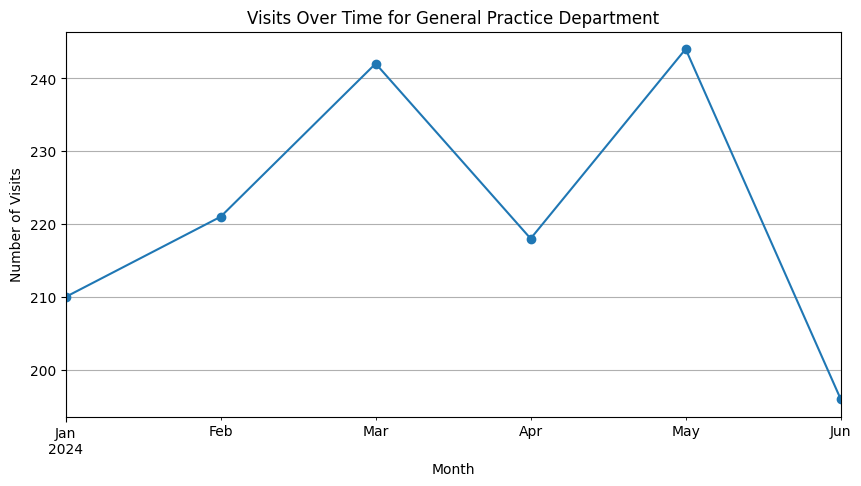

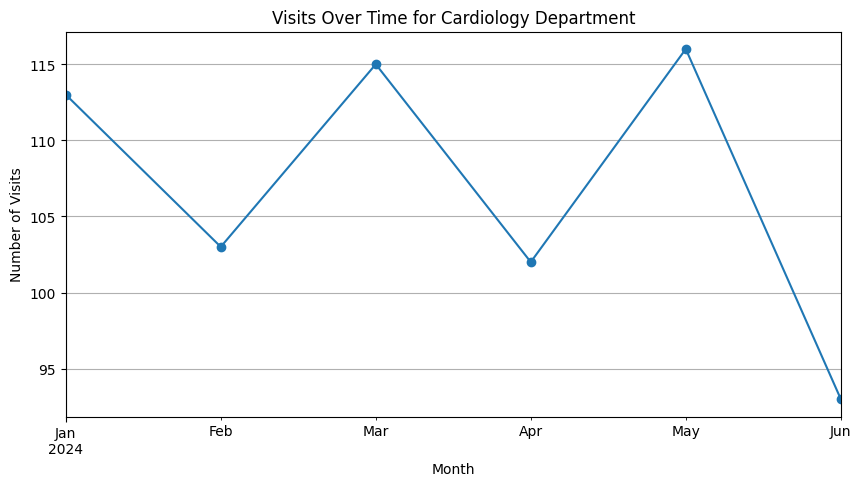

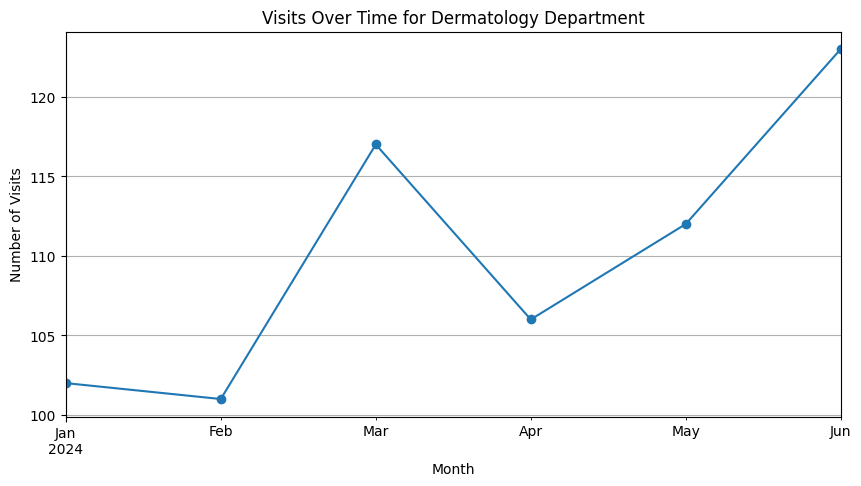

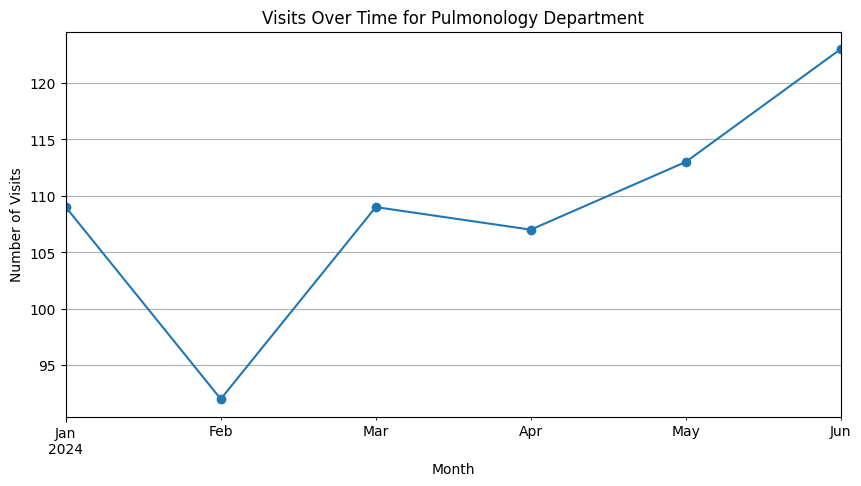

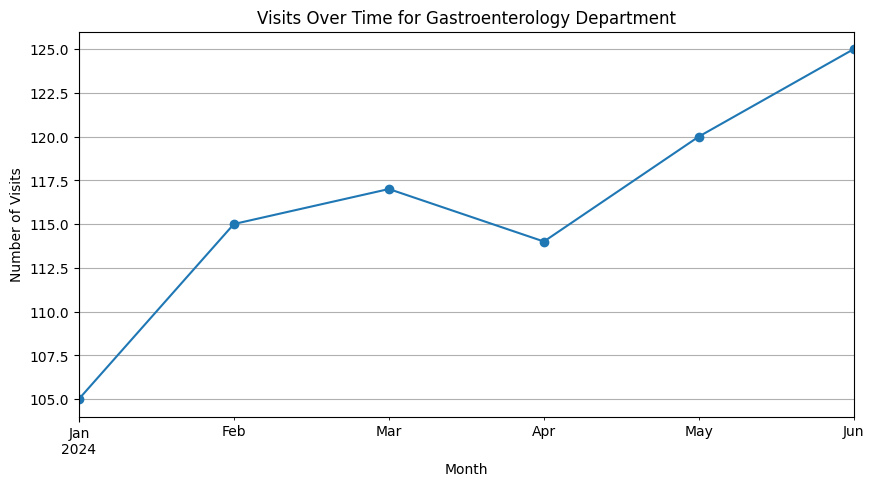

In [32]:
for department in project_data['Department'].unique():
    dept_data = project_data[project_data['Department'] == department]
    visits_over_time = dept_data.groupby(dept_data['Visit Date'].dt.to_period('M')).size()
    
    plt.figure(figsize=(10, 5))
    visits_over_time.plot(marker='o')
    plt.title(f'Visits Over Time for {department} Department')
    plt.xlabel('Month')
    plt.ylabel('Number of Visits')
    plt.grid()
    plt.show()

In [33]:
departments = list(project_data['Department'].unique())

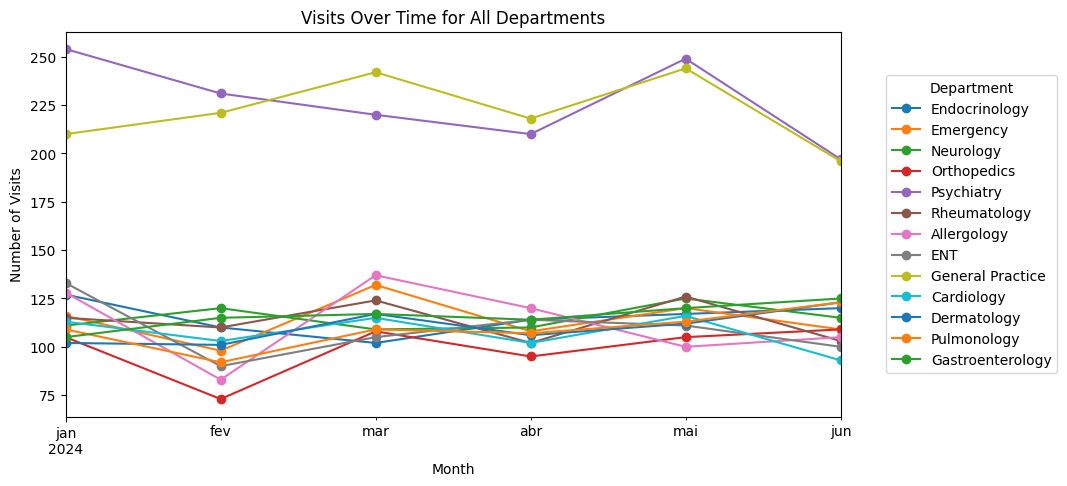

In [ ]:
plt.figure(figsize=(10, 5)) 

plt.title('Visits Over Time for All Departments')
plt.xlabel('Month')
plt.ylabel('Number of Visits')
plt.grid(True)

#one for all departments
for department in project_data['Department'].unique():
    dept_data = project_data[project_data['Department'] == department]
    visits_over_time = dept_data.groupby(dept_data['Visit Date'].dt.to_period('M')).size()
    visits_over_time.index.name = None 
    visits_over_time.plot(marker='o', label=department) 

# Legend Location
plt.legend(title='Department', loc='center left', bbox_to_anchor=(1.05, 0.5))

plt.show()

In [40]:
print(departments)

['Endocrinology', 'Emergency', 'Neurology', 'Orthopedics', 'Psychiatry', 'Rheumatology', 'Allergology', 'ENT', 'General Practice', 'Cardiology', 'Dermatology', 'Pulmonology', 'Gastroenterology']


In [ ]:
# Print actual total visits per month for each department (cleaner output + pivot + plot)
# Compute counts per month (PeriodIndex: YYYY-MM)
project_data['Visit_Month'] = project_data['Visit Date'].dt.to_period('M')

# 1) Print each department's monthly totals
for dept in sorted(project_data['Department'].unique()):
    counts = (
        project_data.loc[project_data['Department'] == dept, 'Visit_Month']
        .value_counts()
        .sort_index()
    )
    if counts.empty:
        print(f"\nDepartment: {dept} - No visits found")
        continue
    print(f"\nDepartment: {dept}")
    # value_counts returns a Series with PeriodIndex; convert to string for readable months
    counts.index = counts.index.astype(str)
    print(counts.to_string())

# 2) Create a pivot table (months x departments) for a compact overview
visits_pivot = pd.crosstab(project_data['Visit_Month'], project_data['Department'])
# Sort index (PeriodIndex) and convert index to string for nicer printing
visits_pivot = visits_pivot.sort_index()
visits_pivot.index = visits_pivot.index.astype(str)

print('\nTotal visits per month (pivot table):')
print(visits_pivot)

# 3) Optional: plot the pivot table as a line chart for visual inspection
try:
    visits_pivot.plot(kind='line', marker='o', figsize=(12, 6))
    plt.xlabel('Month')
    plt.ylabel('Number of Visits')
    plt.title('Visits per Month by Department')
    plt.grid(True)
    plt.legend(title='Department', loc='center left', bbox_to_anchor=(1.05, 0.5))
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"\nPlot failed: {e}")

Visit Date
2024-01    127
2024-02    110
2024-03    102
2024-04    114
2024-05    117
2024-06    120
Freq: M, dtype: int64
Visit Date
2024-01    116
2024-02     98
2024-03    132
2024-04    108
2024-05    120
2024-06    109
Freq: M, dtype: int64
Visit Date
2024-01    111
2024-02    120
2024-03    109
2024-04    110
2024-05    125
2024-06    115
Freq: M, dtype: int64
Visit Date
2024-01    105
2024-02     73
2024-03    108
2024-04     95
2024-05    105
2024-06    109
Freq: M, dtype: int64
Visit Date
2024-01    254
2024-02    231
2024-03    220
2024-04    210
2024-05    249
2024-06    197
Freq: M, dtype: int64
Visit Date
2024-01    115
2024-02    110
2024-03    124
2024-04    102
2024-05    126
2024-06    103
Freq: M, dtype: int64
Visit Date
2024-01    128
2024-02     83
2024-03    137
2024-04    120
2024-05    100
2024-06    105
Freq: M, dtype: int64
Visit Date
2024-01    133
2024-02     90
2024-03    105
2024-04    114
2024-05    111
2024-06    100
Freq: M, dtype: int64
Visit Date
2024-